# Alumno: Miriam López Hernández
## Fecha: 19/04/2023
## Actividad 4. Data Mining

# - Primera parte de la actividad 4. Jupyter anlizando los datos del Titanic Dataset

In [2]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Elimino passengerID porque no aporta ningun tipo de información relevante
df = df.drop('PassengerId', axis = 1)

In [5]:
# Analizamos un poco los datos que tenemos
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
len(df)

891

In [7]:
df.shape

(891, 11)

In [8]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
#Describe no tiene en cuenta las columnas string (object)
df.describe().round(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [10]:
#Queremos ver si nos faltan datos
df.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [12]:
# Cuando faltan tantos datos como en cabina , no merece la pena completar, eliminamos estos datos 
for cabina in df.Cabin:
    print(cabina)

# Siendo nan datos no documentados

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [13]:
# Comenzamos a analizar el DF graficando
# Personas que sobrevivieron, recordando que 0 (No), 1 (Si)

df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

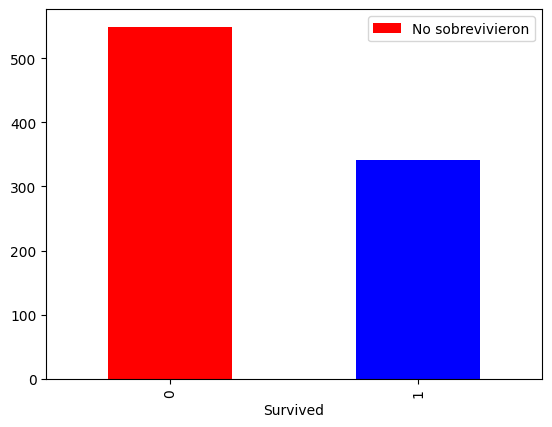

In [14]:
df.Survived.value_counts().plot(kind = 'bar', color = ['red', 'blue'])
plt.legend(['No sobrevivieron', 'Sobrevivieron'])
plt.show()


In [15]:
# 2. Conocer informacion concreta, acceder y analizar columnas: 2 formas (la 1 es mejor si hay espacios)
df['Age'].head(3)

0    22.0
1    38.0
2    26.0
Name: Age, dtype: float64

In [16]:
df.Age.head(3)

0    22.0
1    38.0
2    26.0
Name: Age, dtype: float64

In [17]:
# 3. Informacion concreta con crosstab
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


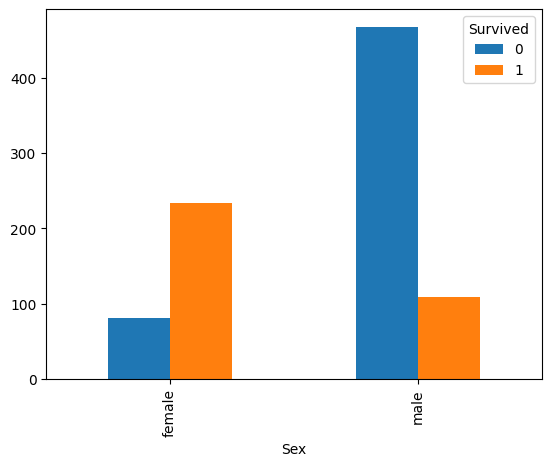

In [18]:
pd.crosstab(df.Sex, df.Survived).plot(kind = 'bar')
plt.show()

La tasa de supervivencia de mujeres es positiva y a pesar de haber menor número total de navegantes chicas sobreviven más mujeres que hombres.

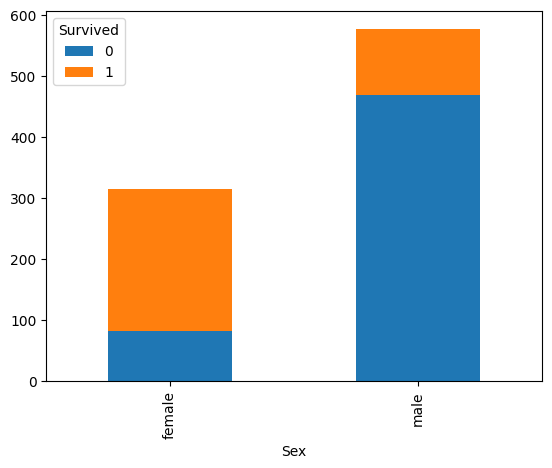

In [19]:
# Visualización apiliada - stacked
pd.crosstab(df.Sex, df.Survived).plot(kind = 'bar', stacked = True)
plt.show()

Aqui se muestra mejor la comparativa total, donde la cantidad de hombres casi duplica la de mujeres. 

In [20]:
# De que clase era la gente que sobrevivió

pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


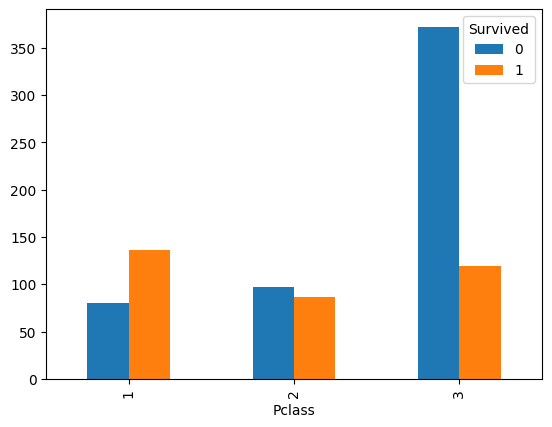

In [21]:
pd.crosstab(df.Pclass, df.Survived).plot(kind = 'bar')
plt.show()

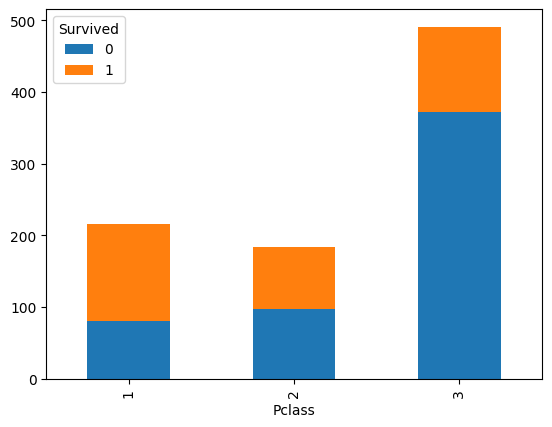

In [22]:
pd.crosstab(df.Pclass, df.Survived).plot(kind = 'bar', stacked = True)
plt.show()

- En 1 clase sobreviven más que mueren, en 2 y 3 mueren más que viven sobre todo en 3 clase en la que mueren la mayoría (aprox. 4/5)

In [23]:
# 5. Seleccionar infotmación concreta con: groupby

df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: xlabel='Sex,Survived'>

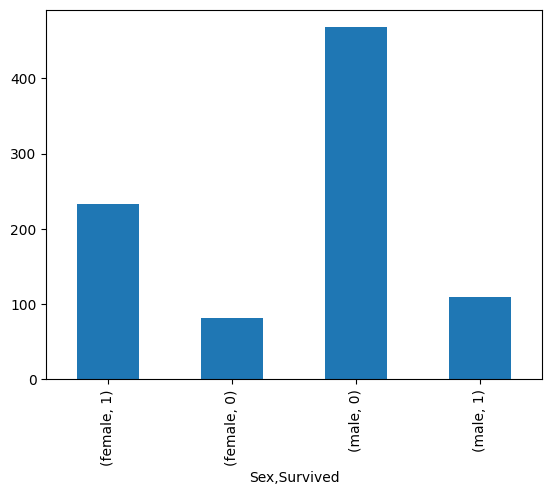

In [24]:
df.groupby('Sex').Survived.value_counts().plot(kind = 'bar')

Sobreviven más mujeres que hombres a pesar de haber menos. De hecho mueren menos mujeres que hombres sobreviven. 

In [25]:
# 6. Seleccionar información concreta:
# crea un df con todas la columnas poniendo la condicion que son solo la gente de 1º clase.

df_sex_uno = df[df.Pclass == 1]
df_sex_uno.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [26]:
# Columna de supervivencia para los pasajeros que sean de 1 clase
df_sex_uno_crosstab = df[df.Pclass == 1]['Survived']
df_sex_uno_crosstab

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

CREACION DE NUEVOS DF

In [27]:
df_surv = df[df['Survived'] == 1]
df_surv.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [28]:
df_surv_fem = df[(df['Survived'] == 1) & (df['Sex'] == 'female')]
df_surv_fem.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [29]:
df_surv_fem_1 = df[(df['Survived'] == 1) & (df['Sex'] == 'female') & (df['Pclass'] == 1)]
df_surv_fem_1.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


6. OBTENCION DE INFORMACION DE LOS GRAFICOS

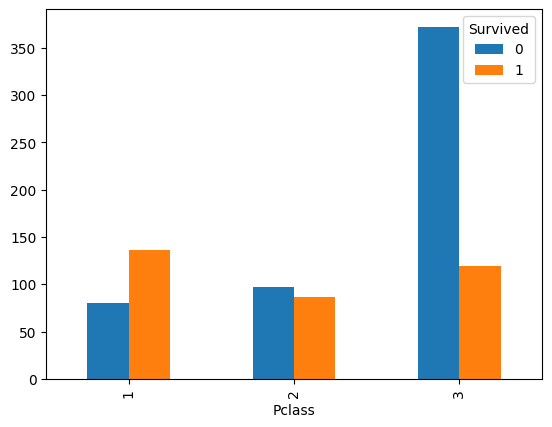

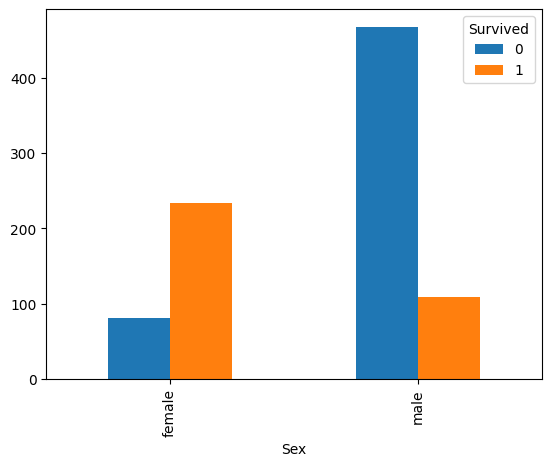

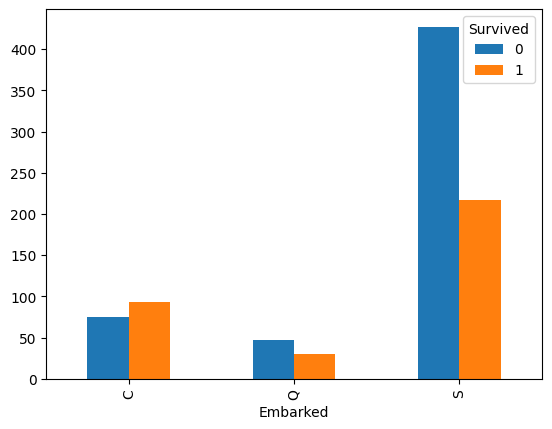

In [30]:
# Hacer un grafico en funcion de la supervivencia y las opciones que le pasamos con un for
opciones = ['Pclass', 'Sex', 'Embarked']

for opcion in opciones:
    pd.crosstab(df[opcion], df.Survived).plot(kind = 'bar')
    plt.show

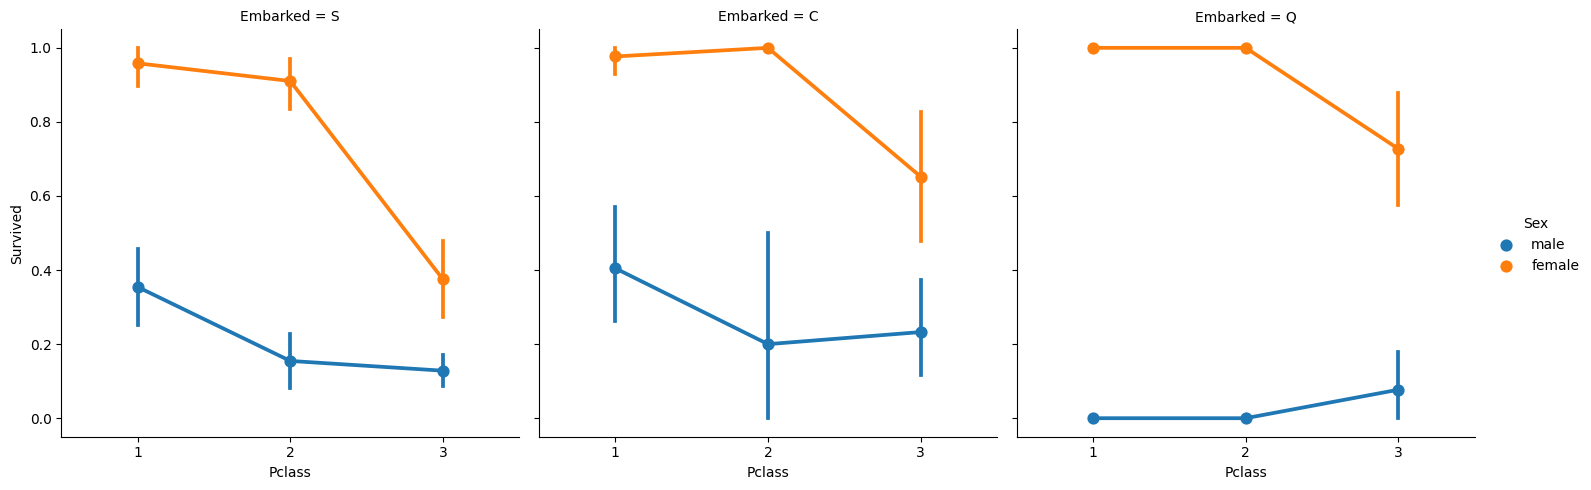

In [31]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked' , kind = 'point', data = df)
plt.show()

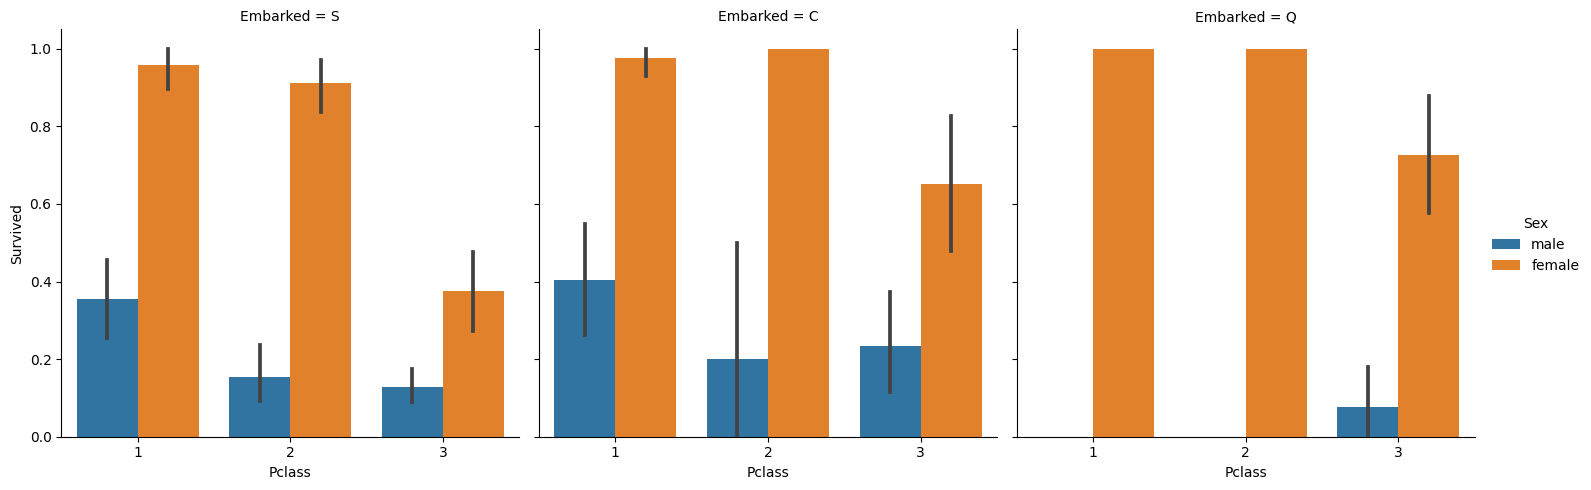

In [32]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked' , kind = 'bar', data = df)
plt.show()

- En todas las puertas de embarque la tasa de supervivencia de mujeres fue mucho mayor.
- En la puerta de embarque S hay gran diferencia entre mujeres de 1 y 2 clase que sobreviven con respecto a 3.
- En la puerta Q no sobrevive ningun hombre de 1 y 2 clase, y solo unos pocos de 3. 
- La puerta C es la que más tasa de exito tiene en todos los casos. 

<Axes: xlabel='Sex', ylabel='Age'>

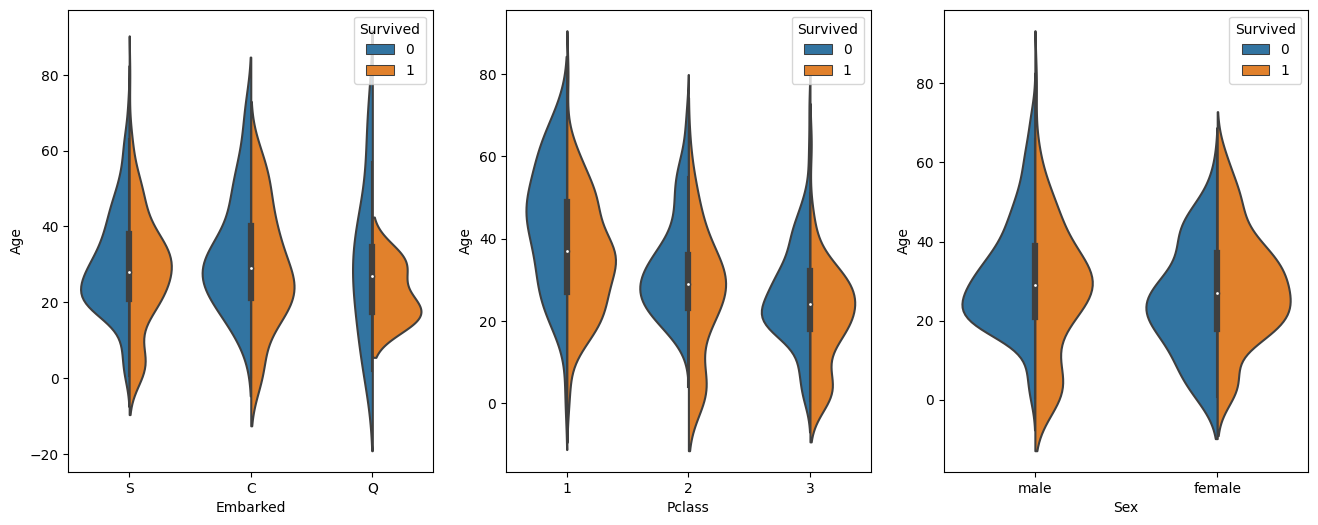

In [33]:
# Analizando la edad con split
'''131 significa que habrá una matriz de subplots con 1 fila y 3 columnas, 
que el primer subplot estará en la posición 1 de la matriz (es decir, en la primera columna de la primera fila).
gráficos de violín. Este tipo de gráfico muestra la distribución de una variable numérica (en este caso, la edad)'''
# Creo la figura y subcolumnsas
fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3= fig.add_subplot(133)

# violinplot
sns.violinplot(x = 'Embarked', y = 'Age', hue = 'Survived', data = df, split = True, ax = ax1)
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df, split = True, ax = ax2)
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df, split = True, ax = ax3)

Conclusiones: 
- Puerta y edad: 
    - En la puerta Q hay una clara preferencia en la tasa de supervivencia en edades comprendidas entre 18-35 años
    - En las otras encontramos un aspecto similar. 
    - Q a diferencia de S y C no hubo menores de edad supervivientes
- Clase y edad
    - En los tres grupos de edad se ve una clara tendencia positiva hacia la supervivencia de la gente joven , sobre todo en 2 
    - Indiferentemente de la clase, casi la mayoría de adultos mayores de 70 mueren. 
    2 y 3 clase. 
- Sexo y edad
    - La mayoría de hombres menores de 20 años sobrevivieron, en mujeres hay una dispesion 50-50.
    

In [34]:
df.Age.describe().round(2)

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64

In [35]:
df.Age[(df.Sex == 'male') & (df.Age > 20)].describe().round(2)

count    351.00
mean      35.81
std       12.22
min       20.50
25%       26.00
50%       32.50
75%       42.50
max       80.00
Name: Age, dtype: float64

In [36]:
df.Age[(df.Sex == 'female') & (df.Age > 20)].describe().round(2)

count    184.00
mean      34.62
std       10.58
min       21.00
25%       26.00
50%       32.25
75%       41.00
max       63.00
Name: Age, dtype: float64

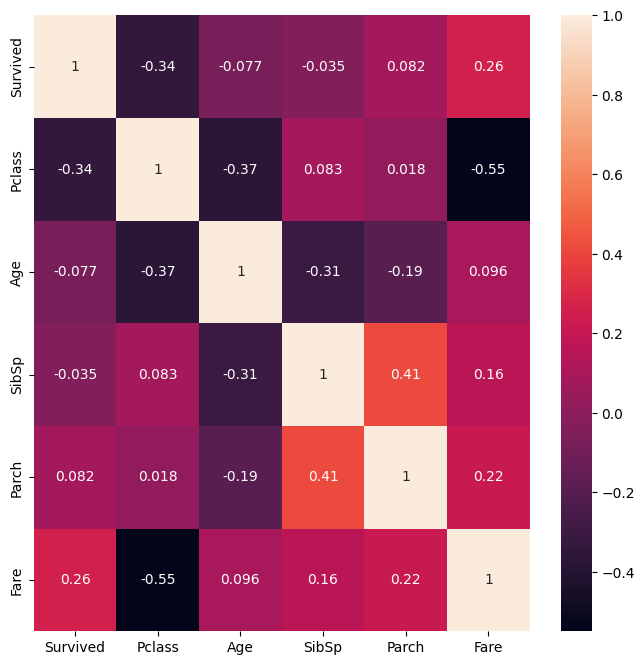

In [38]:
# Heatmap
# Solo nos quedamos con las columnas numericas del df, sin tener en cuenta las string.
heat_df = df.select_dtypes(include = np.number)
plt.figure(figsize = (8,8))
sns.heatmap(heat_df.corr(), annot = True)
plt.show()

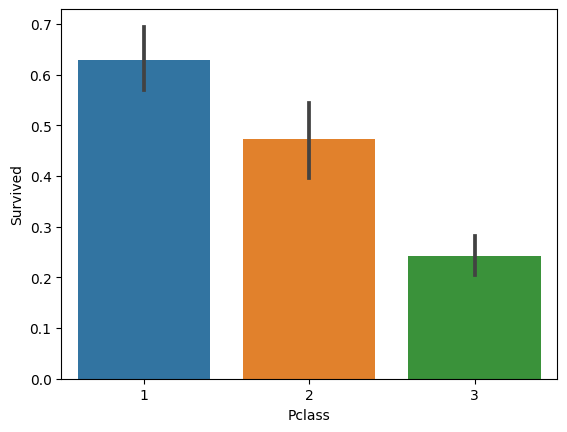

In [39]:
# Barplot
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.show()

In [44]:
# Feat es un parametro de la variable a graficas, 

def graficas(a):
    plt.subplot(2,1,1)
    df.groupby(a).Survived.value_counts().plot(kind = 'bar')
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,2)
    sns.barplot(x = a, y = 'Survived', data = df)
    plt.show()

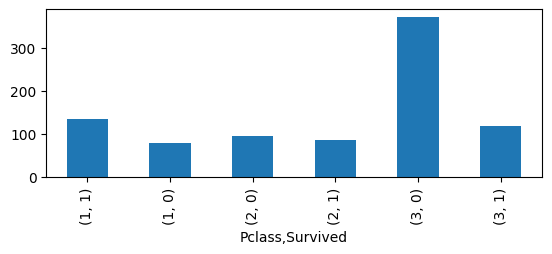

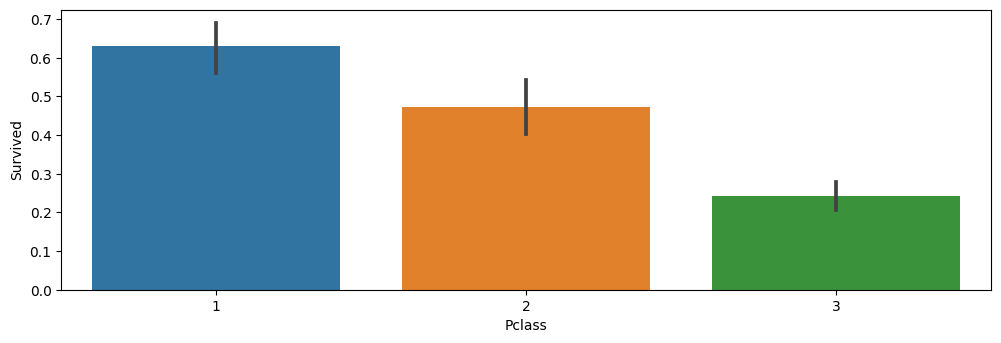

In [45]:
# Llamamos a la funcion:
graficas('Pclass')

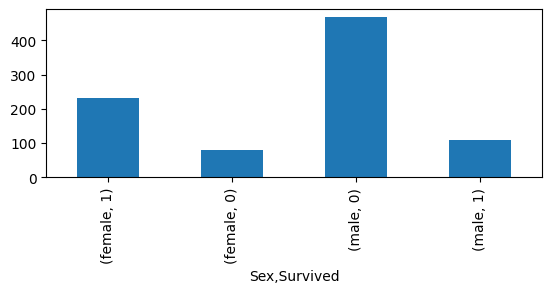

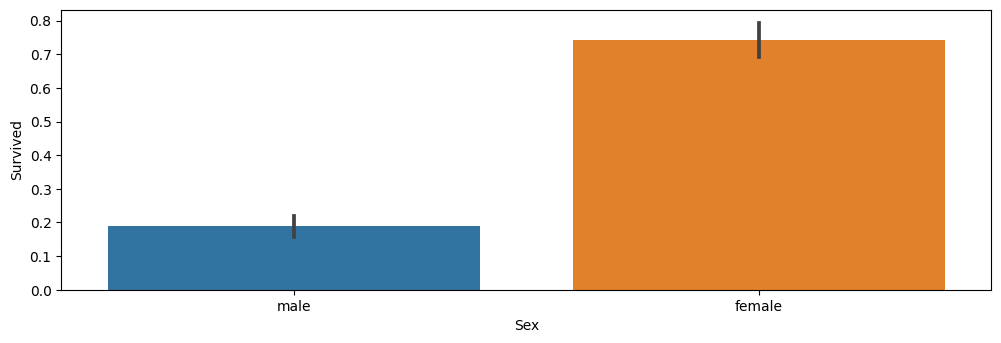

In [46]:
graficas('Sex')

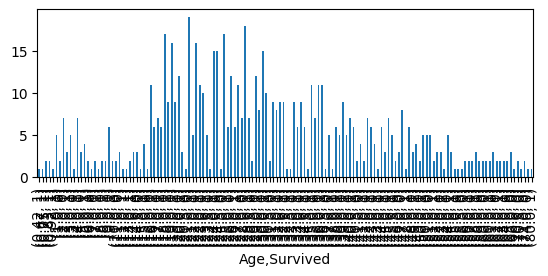

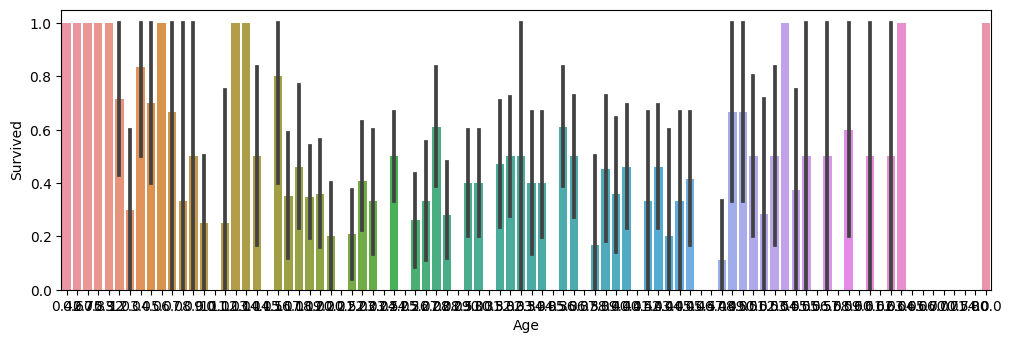

In [47]:
graficas('Age')

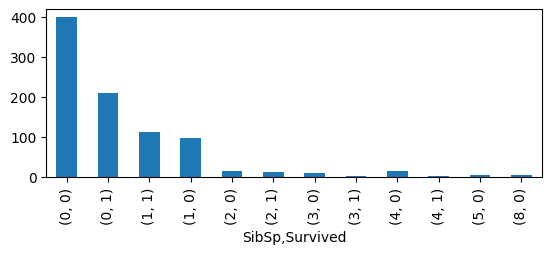

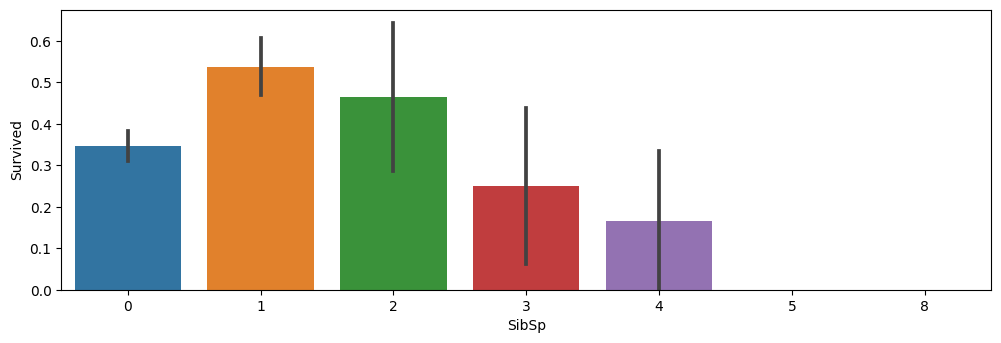

In [48]:
graficas('SibSp')

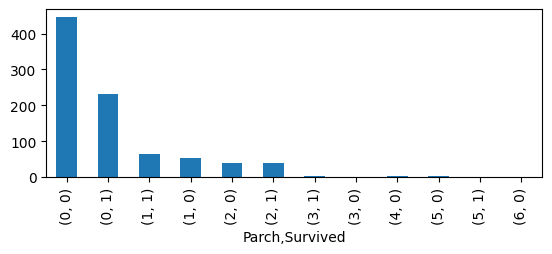

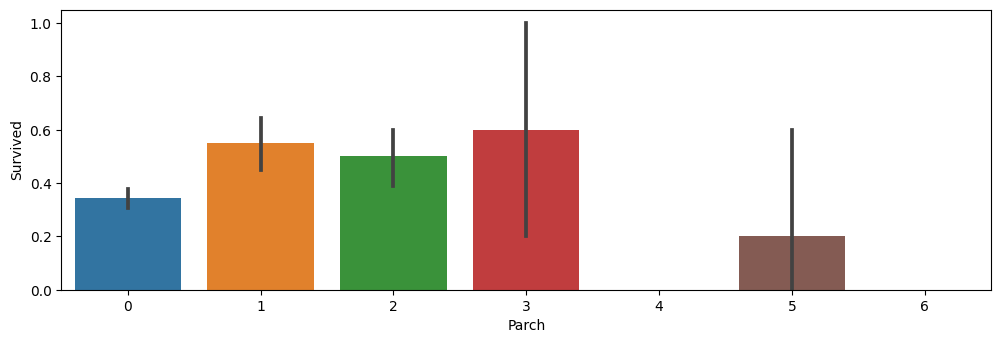

In [49]:
graficas("Parch")

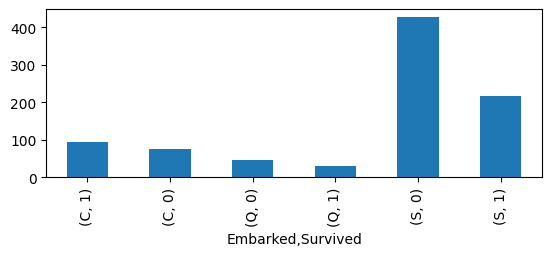

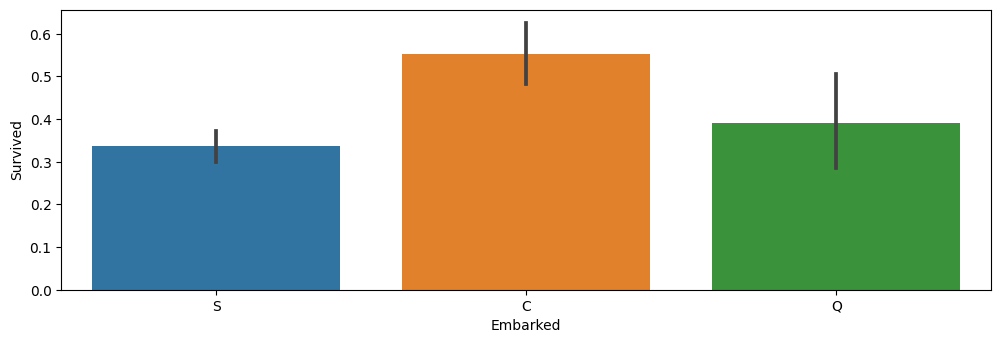

In [50]:
graficas('Embarked')

In [51]:
# --------------------------------

# Segunda parte Act.4

Pregunta -1-
Si estás trabajando con un set de datos, y necesitas ver rápidamente la
información de una columna con un gráfico.
¿Qué librería usarías? ¿Por qué?
Si quieres puedes añadir un ejemplo. No es necesario, no obstante

- Usaria matplotlib o seaborn debido a su flexibilidad y facilidad de uso, además con ambas creamos visualizaciones que son rápidas y sencillas de interpretar, sus gráficos eficientes y suficientes para un análisis rápido del DataSet.
- Su visualización de datos se integra facilmente con pandas, lo que aporta utilidad en la exploración de datos inicial que estamos buscando. 

Pregunta -2-
¿Te parece difícil la forma en que creamos “nuevos DataFrames”?
(seleccionando solo ciertas filas o columnas, bajo ciertas condiciones o
premisas).


- Creo que cuando lo ves por primera vez es dificil de entender pero con la práctica uno se hace al método y comprendes la estructura de los df como matrices a las que acceder a los datos.

Pregunta -3-
Busca algo de información acerca de “Heatmap” y explica con tus palabras lo
que consideres oportuno


- Un mapa de calor (heatmap) es una forma visual de representar la matriz de correlación o covarianza de un conjunto de variables. En un mapa de calor, cada celda representa el grado de relación entre dos variables, siendo el color el indicador del nivel de correlación.

- En general, el mapa de calor utiliza una escala de colores donde los tonos oscuros indican correlaciones negativas y los tonos claros indican correlaciones positivas. Un valor cercano a 0 se puede representar con un color intermedio.

- El mapa de calor también puede incluir etiquetas (por ejemplo, nombres de variables) en los ejes horizontal y vertical para indicar qué variables se están comparando. Además, en algunos casos, se pueden agregar valores numéricos en cada celda, lo que permite obtener más información sobre la magnitud de la correlación.

- Las correlaciones y covarianzas son medidas estadísticas que se utilizan para cuantificar la relación entre dos variables en un conjunto de datos.

- La correlación mide el grado de relación lineal entre dos variables, lo que significa que la correlación puede ser positiva, negativa o nula. Una correlación positiva indica que cuando una variable aumenta, la otra variable también tiende a aumentar. Por otro lado, una correlación negativa indica que cuando una variable aumenta, la otra variable tiende a disminuir. Una correlación nula significa que no existe una relación lineal entre las dos variables.

- La covarianza, por otro lado, mide la variabilidad conjunta entre dos variables. Si la covarianza es positiva, significa que cuando una variable aumenta, la otra variable también tiende a aumentar. Si la covarianza es negativa, significa que cuando una variable aumenta, la otra variable tiende a disminuir. Si la covarianza es cero, no hay una relación lineal entre las dos variables.

- Las correlaciones y covarianzas son importantes porque pueden ayudarnos a entender cómo se relacionan las variables en un conjunto de datos. Por ejemplo, si estamos interesados en predecir el precio de una casa, las correlaciones y covarianzas pueden ayudarnos a identificar qué variables están más relacionadas con el precio de la casa, como el tamaño de la casa, la ubicación, el número de habitaciones, etc. 

- En nuestro caso el mapa de calor podría ayudarnos a ver rápidamente si existia alguna relacion entre alguna de la s variables de edad, clase, sexo con respecto por ejemplo al exito de supervivencia.


Pregunta -4-
Hemos usado diferentes tipos de gráficos.
¿Se entiende bien cuando usar un “violinplot” o un “factorplot” por ejemplo?
¿Serías capaz de emplearlo en otro set de datos?


In [71]:
# “factorplot” no esta disponible actualmente con sns, se elije boxplot
df2 = pd.read_csv('athletes.csv')
df2 = df2.dropna()
df2.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
102,2720.0,Justin Adams,South Central,Woodward CrossFit,Woodward CrossFit,Male,24.0,68.0,180.0,126.0,...,240.0,475.0,405.0,80.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|
110,6922.0,Daniel Adamson,South West,CrossFit The Point,CrossFit The Point,Male,31.0,67.0,150.0,244.0,...,175.0,410.0,330.0,42.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I do multipl...,2-4 years|
116,12563.0,Steven Lee Adams,Mid Atlantic,CrossFit Kaiju,CrossFit Kaiju,Male,37.0,72.0,210.0,162.0,...,205.0,525.0,425.0,49.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|I ty...,4+ years|
238,24943.0,Greg Adler,Mid Atlantic,CrossFit Fairfax,CrossFit Fairfax,Male,44.0,73.0,184.0,317.0,...,155.0,405.0,255.0,31.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,4+ years|
304,3066.0,Luke Ahlfield,North Central,CrossFit Homer Glen,CrossFit Homer Glen,Male,31.0,72.0,215.0,146.0,...,255.0,455.0,386.0,50.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I strictly schedule my rest days|,2-4 years|


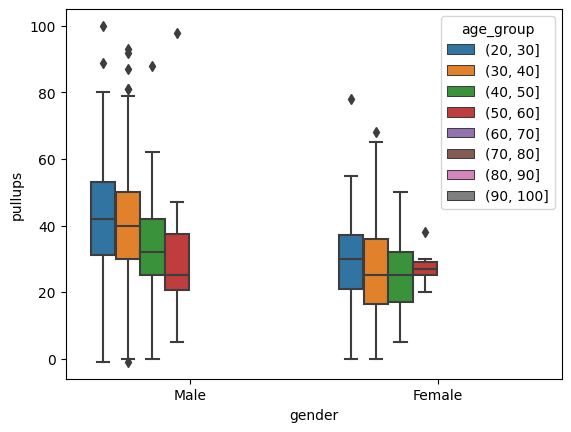

In [83]:
df2['age_group'] = pd.cut(df2['age'], bins=range(20, 101, 10))]
sns.boxplot(x="gender", y="pullups", data=df2, hue="age_group")
plt.show()

- En esta gráfica podríamos interpretar que la media de flexiones es mayor en personas jóvenes en ambos sexos. 
- En el caso de las mujeres se obtienen unos valores similares entre edad 30-50, pero en hombres el resultado desciende según incrementa la edad.
- Además se ve que hay más hombres que mujeres en total, y de más edad. 
- También que hay una clara diferencia entre hombres y mujeres, pero no tanta como la que podría ser levantando peso en sentadilla dado que es un ejercicio que se usa con el propio peso corporal.